In [310]:
# import necessary libraries
from tensorflow import keras
import numpy as np


# load dataset
from keras.datasets import mnist


# split dataset into training and test set
(x_train, y_train), (x_test, y_test) = mnist.load_data()

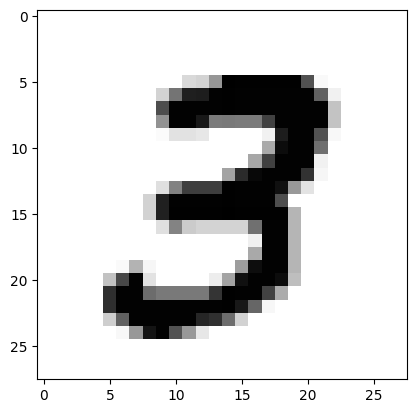

In [311]:
# Display images

import matplotlib.pyplot as plt
plt.imshow(x_train[7], cmap=plt.cm.binary)

In [312]:
# View the labels
print(y_train[7])

3


In [313]:
# View the labels
print(y_train[7])

3


In [314]:
# View the dimension of tensor

print(x_train.shape)

(60000, 28, 28)


In [315]:
# View the data type of tensor

print(x_train.dtype)

uint8


In [316]:
# scale the input values to type float32

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [317]:
# scale the input values within the interval [0, 1]

x_train /= 255
x_test /= 255

In [318]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [319]:
print(x_train.shape)

(60000, 784)


In [320]:
print(x_test.shape)

(10000, 784)


In [321]:
from keras.utils import to_categorical

In [322]:
print(y_test[0])

7


In [323]:
print(y_train[0])

5


In [324]:
print(y_train.shape)

(60000,)


In [325]:
print(x_test.shape)

(10000, 784)


In [326]:
y_train = to_categorical(y_train, num_classes=10)

y_test = to_categorical(y_test, num_classes=10)

In [327]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [328]:
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [329]:
print(y_train.shape)

(60000, 10)


In [330]:
print(y_test.shape)


(10000, 10)


In [331]:
from keras.models import Sequential
from keras.layers import Dense, Activation


model = Sequential()
model.add(Dense(10, activation='sigmoid', input_shape=(784,)))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(units=10, activation='softmax'))



C:\Users\nnyen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [332]:
model.summary()


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_24 (Dense)                │ (None, 10)             │         7,850 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 10)             │           210 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,280 (32.34 KB)

 Trainable params: 8,280 (32.34 KB)

 Non-trainable params: 0 (0.00 B)

Using Accuracy Metric

In [333]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [334]:
model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10


600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.4346 - loss: 2.0530
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8124 - loss: 0.9884
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8589 - loss: 0.6105
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8809 - loss: 0.4667
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8916 - loss: 0.3962
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9000 - loss: 0.3567
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9084 - loss: 0.3263
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9109 - loss: 0.3123
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9143 - loss: 0.2973
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9172 - loss: 0.2833


In [335]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9051 - loss: 0.3309


In [336]:
print(test_acc)

0.9154999852180481


In [337]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


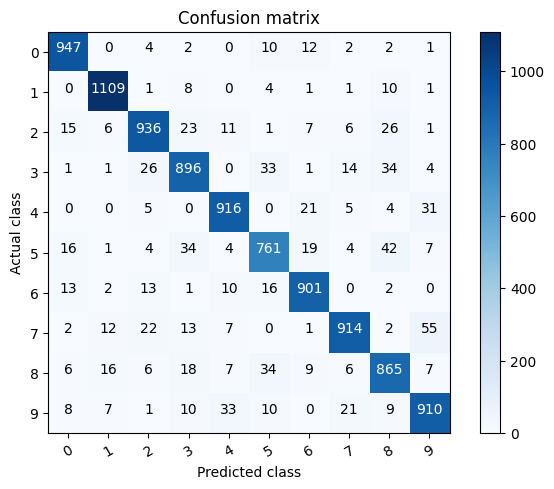

In [338]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [339]:
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 995us/step


In [340]:
np.argmax(predictions[11])

6

In [341]:
print(predictions[11])

[5.0614909e-03 6.1585830e-05 1.2999095e-01 1.3766302e-03 5.5868000e-02
 2.4873754e-03 8.0162060e-01 7.2732707e-04 1.1871229e-03 1.6188701e-03]


In [342]:
np.sum(predictions[11])

1.0

Using Probabilistic metrics

In [343]:
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.BinaryCrossentropy()])

model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_crossentropy: 0.4398 - loss: 0.0120
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.4343 - loss: 0.0115
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.4277 - loss: 0.0110
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.4201 - loss: 0.0108
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.4115 - loss: 0.0105
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.4037 - loss: 0.0101
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.3986 - loss: 0.0100
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.3909 - loss: 0.0097
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.3870 - loss: 0.0097
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - binary_crossentropy: 0.3823 - loss: 0.0094


In [344]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - binary_crossentropy: 0.3926 - loss: 0.0123


In [345]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


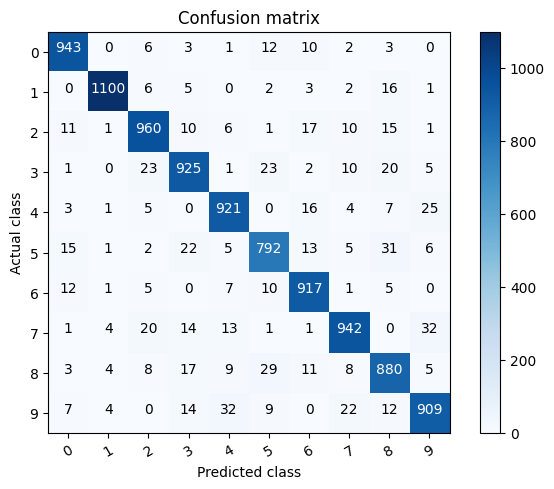

In [346]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [347]:
print(test_acc)

0.389053612947464


Image segmentation metrics

In [348]:
model.compile(optimizer='adam', loss='mse', metrics=[keras.metrics.IoU(num_classes=2, target_class_ids=[0])])

model.fit(x_train, y_train, batch_size=100, epochs=10)

Epoch 1/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - io_u_7: 0.9000 - loss: 0.0092
Epoch 2/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - io_u_7: 0.9000 - loss: 0.0092
Epoch 3/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - io_u_7: 0.9000 - loss: 0.0091
Epoch 4/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - io_u_7: 0.9000 - loss: 0.0089
Epoch 5/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - io_u_7: 0.9000 - loss: 0.0086
Epoch 6/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - io_u_7: 0.9000 - loss: 0.0088
Epoch 7/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - io_u_7: 0.9000 - loss: 0.0087
Epoch 8/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - io_u_7: 0.9000 - loss: 0.0085
Epoch 9/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - io_u_7: 0.9000 - loss: 0.0083
Epoch 10/10
600/600 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - io_u_7: 0.9000 - loss: 0.0080


In [349]:
test_loss, test_acc = model.evaluate(x_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - io_u_7: 0.9000 - loss: 0.0120


In [350]:
# Plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=30)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Actual class')
    plt.xlabel('Predicted class')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


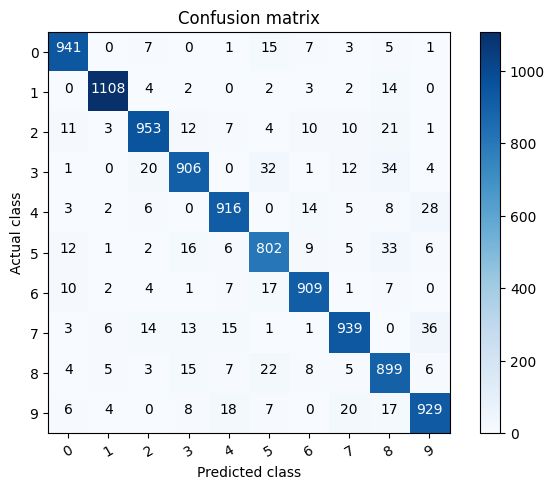

In [351]:
from collections import Counter
from sklearn.metrics import confusion_matrix
import itertools

# Predict the values from the validation dataset
Y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors
Y_pred_classes = np.argmax(Y_pred, axis = 1)
# Convert validation observations to one hot vectors
Y_true = np.argmax(y_test, axis = 1)
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes)
# plot the confusion matrix
plot_confusion_matrix(confusion_mtx, classes = range(10))

In [352]:
print("accuracy:",test_acc)

accuracy: 0.8999998569488525
